In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
data_dir = r"C:\Users\kanna\OneDrive\Documents\Study related\Project\Mulberry Data"

In [6]:
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset="training"
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset="validation"
)


Found 874 images belonging to 3 classes.
Found 217 images belonging to 3 classes.


In [7]:
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # freeze base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(train_gen.num_classes, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

C:\Users\kanna\anaconda3\envs\sericulture\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 526s 19s/step - accuracy: 0.8227 - loss: 0.4470 - val_accuracy: 0.9032 - val_loss: 0.2564
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 788s 28s/step - accuracy: 0.9439 - loss: 0.1402 - val_accuracy: 0.8802 - val_loss: 0.2524
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1105s 39s/step - accuracy: 0.9737 - loss: 0.0914 - val_accuracy: 0.8756 - val_loss: 0.3066
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 927s 33s/step - accuracy: 0.9851 - loss: 0.0663 - val_accuracy: 0.9217 - val_loss: 0.2581
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 936s 34s/step - accuracy: 0.9886 - loss: 0.0527 - val_accuracy: 0.8940 - val_loss: 0.3166
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1037s 37s/step - accuracy: 0.9908 - loss: 0.0379 - val_accuracy: 0.9171 - val_loss: 0.2594
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1509s 53s/step - accuracy: 0.9943 - loss: 0.0356 - val_accuracy: 0.9263 - val_loss: 0.2430
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 822s 30s/step - accuracy: 0.9943 - loss: 0.0348 - val_accuracy:

In [9]:
val_loss, val_acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 112s 15s/step - accuracy: 0.9171 - loss: 0.2488
Validation Accuracy: 91.71%


7/7 ━━━━━━━━━━━━━━━━━━━━ 81s 10s/step
                     precision    recall  f1-score   support

Disease Free leaves       0.44      0.45      0.45        88
          Leaf Rust       0.47      0.41      0.44        97
          Leaf spot       0.17      0.22      0.19        32

           accuracy                           0.40       217
          macro avg       0.36      0.36      0.36       217
       weighted avg       0.41      0.40      0.41       217



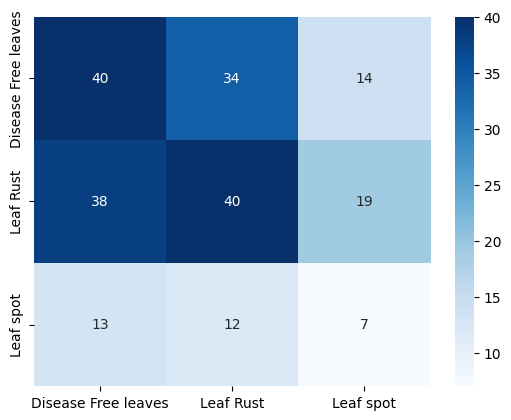

In [10]:
y_true = val_gen.classes
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=val_gen.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=val_gen.class_indices.keys(), yticklabels=val_gen.class_indices.keys())
plt.show()


In [11]:
model.save("leaf_disease_model.h5")
print("Model saved as leaf_disease_model.h5")


Model saved as leaf_disease_model.h5
